# Homework 1 - Part 1

---

This file is the first homework of "Fundamental of Data Analytics"

[Dataset](https://drive.google.com/file/d/1JUM5y1o4hYdZIioy2gN-I22a8673S6Pt/view?usp=sharing)

__For this homework, please use the first 10000 rows.__ e.g. `pd_data = pd_data[:10000]`

---

## Import Library And Dataset

Import Library

In [1]:
# Basic data frame library
import numpy as np
import pandas as pd
import scipy as sp

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Time module
import time

Import Dataset

In [2]:
dataset = pd.read_csv("input/Reviews.csv")[:10000]
dataset.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


---

## Question 1 - Top-10 reviewer

* Sort by number of reviews (hint : "ProfileName", "UserId")
* Also, show his/her average score

In [3]:
score_reviews = dataset.loc[:,["UserId", "ProfileName", "Score"]]
score_reviews = score_reviews.set_index(keys=["UserId", "ProfileName"])

top_reviewers = score_reviews.groupby(["UserId", "ProfileName"]).count()
top_reviewers.rename(columns={"Score":"Score count"}, inplace=True)
top_reviewers["Score mean"] = score_reviews.groupby(["UserId", "ProfileName"]).mean()
top_reviewers = top_reviewers.sort_values(by="Score count", ascending=False)
top_reviewers.head(10)

,,Score count,Score mean
UserId,ProfileName,,
A1Z54EM24Y40LL,c2,17,3.882353
A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,3.800000
A35R32TA60XD57,M. Torma,9,4.111111
A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,5.000000
A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,4.428571
A3NHUQ33CFH3VM,Citizen John,7,3.142857
A3PJZ8TU8FDQ1K,Jared Castle,7,4.714286
AQ6SHOW0VMZGF,"K. Padgett ""familyof5""",6,2.666667
A26NFIQ7KWI8Y7,kt rose,6,2.666667


---

## Question 2 - Plot score distribution for the user with the most number of reviews

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Count')

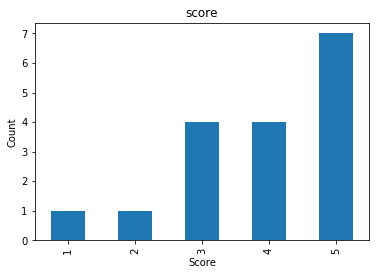

In [4]:
top_reviewer = top_reviewers.index.values[0]

score = score_reviews.loc[top_reviewer].groupby("Score")["Score"].count()

ax = score.plot(kind="bar", title="score")
ax.set_xlabel("Score")
ax.set_ylabel("Count")

---

## Question 3 - Plot pandas Series DataFrame (Time->Date)

* axis-X : Date of reviews (transfer column "Time" -> Date)
* axis-Y : Numbers of reviews in the date interval
* Type : bar graph

Text(0, 0.5, 'Review count')

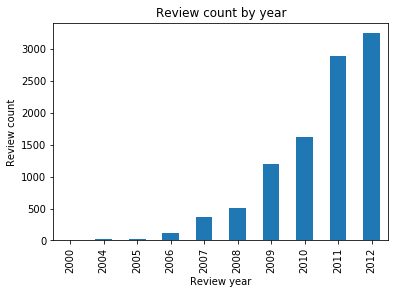

In [5]:
def year(x):
    return time.localtime(x).tm_year

time_reviews = dataset.loc[:,["Time"]]
time_reviews["Time"] = time_reviews["Time"].apply(year)

year_count = time_reviews.groupby("Time")["Time"].count()

ax = year_count.plot(kind="bar", title="Review count by year")
ax.set_xlabel("Review year")
ax.set_ylabel("Review count")

---

## Question 4 - Plot HeatMap using seaborn

* Correlation between numeric features (Id, HelpfulnessNumerator, HelpfulnessDenominator, Score, Time)

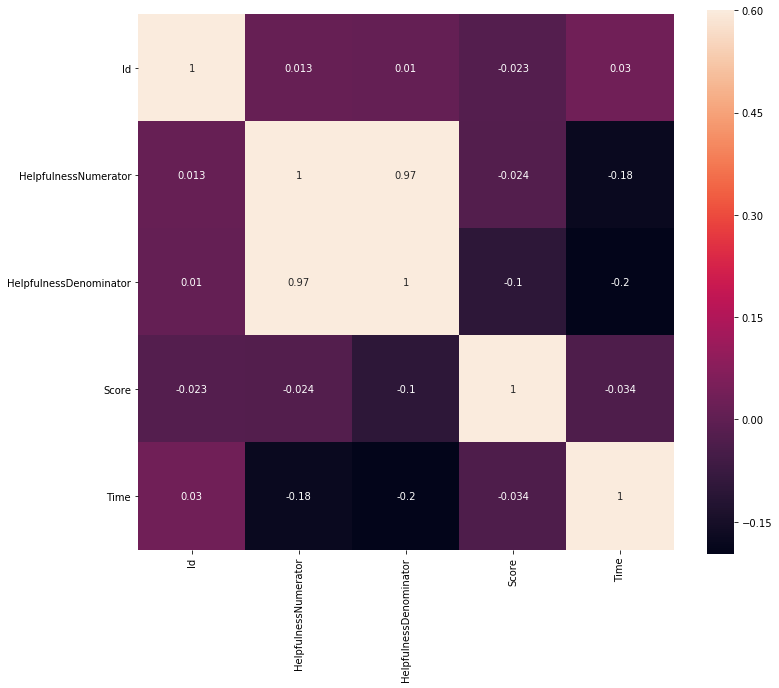

In [6]:
heat_map_reviews = dataset.loc[:,["Id", "HelpfulnessNumerator", "HelpfulnessDenominator", "Score", "Time"]]

plt.figure(figsize=(12,10))
sns.heatmap(heat_map_reviews.corr(), vmax=0.6, square=True, annot=True)

---

## Question 5 - Helpful percent

* If viewers of that comment upvote the comment, then it adds to Helpfulness numerator.
* If viewers of that comment just make a comment, then it adds to Helpfulness denominator.
* **Note : you should filter out some cases with numerator > denominator**
* Plot the distribution of helpful percent (hint: .hist())
* **Ratio = -1, if both Helpfulness numerator & Helpfulness denominator are zero.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020B43EAFB38>]],
      dtype=object)

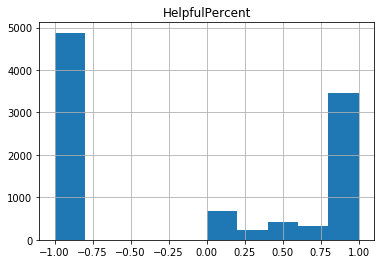

In [7]:
def helpful_percent(x):
    numerator = x["HelpfulnessNumerator"]
    denominator = x["HelpfulnessDenominator"]
    if numerator == 0 and denominator == 0:
        return -1
    else:
        return numerator / denominator

percent = dataset.loc[:,["Id", "HelpfulnessNumerator", "HelpfulnessDenominator"]]
percent = percent.set_index(keys=["Id"])
percent["HelpfulPercent"] = percent.apply(helpful_percent, axis=1)
percent = percent[percent["HelpfulPercent"] <= 1]
percent.hist(column="HelpfulPercent")